In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import gc
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import copy

In [6]:
%%time

# label file
data = pd.read_csv('safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

# feature file
files = glob.glob("safety/features/*.csv")
features = [pd.read_csv(f) for f in files]
all_features = pd.concat(features,ignore_index=True)

# del features
# gc.collect()

CPU times: user 30.4 s, sys: 3.48 s, total: 33.9 s
Wall time: 33.9 s


In [7]:
%%time
all_features = all_features.astype({
    'bookingID': 'int64', 
    'Accuracy':'float32',
    'Bearing':'float32',
    'acceleration_x':'float32',
    'acceleration_y':'float32',
    'acceleration_z':'float32',
    'gyro_x':'float32',
    'gyro_y':'float32',
    'gyro_z':'float32',
    'second':'float32',
    'Speed':'float32'
})

all_features.sort_values(['bookingID','second'], inplace=True)
all_features.reset_index(drop=True, inplace=True)

CPU times: user 25.7 s, sys: 4.04 s, total: 29.7 s
Wall time: 29.7 s


In [8]:
all_features.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941462,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835589,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


In [ ]:
%%time
# create dict

df_dict = {}
for booking_id in data['bookingID']:

    key_name = booking_id 

    df_dict[key_name] = copy.deepcopy(all_features.loc[all_features.bookingID==booking_id])
    #df_dict[key_name] = all_features.loc[all_features.bookingID==id_]
    
df_dict.keys()

In [11]:
df_dict['0']

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941462,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835589,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454
5,0,8.0,143.298294,-0.608313,-9.539658,-1.794583,-0.007538,-0.023838,0.018068,5.0,0.228454
6,0,8.0,143.298294,-0.867758,-9.698614,-1.615439,0.022728,-0.012178,0.005982,6.0,0.228454
7,0,8.0,143.298294,-1.050790,-9.745270,-1.411771,0.027603,0.001841,0.000904,7.0,0.228454
8,0,8.0,143.298294,-0.721213,-9.960004,-1.202271,0.001864,-0.007702,0.014018,8.0,0.228454
9,0,8.0,143.298294,-0.346924,-9.532629,-1.204663,0.014962,-0.050033,0.025118,9.0,0.228454


In [70]:
def convert(all_data,col_name,booking_id):
    col_list = all_data.loc[all_data['bookingID']==booking_id].sort_values(col_name)[col_name].tolist()
    return col_list

In [207]:
def plot_all(number):
    d_df = data.loc[data.label==1].reset_index(drop=True)['bookingID']
    s_df = data.loc[data.label==0].reset_index(drop=True)['bookingID']
    
    
    d = all_data.loc[all_data['bookingID']==d_df[number]].sort_values('second')
    s = all_data.loc[all_data['bookingID']==s_df[number]].sort_values('second')
    
    y1 = 'acceleration_x'
    y2 = 'acceleration_y'
    y3 = 'acceleration_z'
    y4 = 'Bearing'
    y5 = 'gyro_x'
    y6 = 'gyro_y'
    y7 = 'gyro_z'
    y8 = 'Speed'
    
    
    
    
    x_d = np.linspace(0,d.tail(1)['second'],d.tail(1)['second']+1).flatten()
    x_s = np.linspace(0,s.tail(1)['second'],s.tail(1)['second']+1).flatten()
    
    yd_secs = [-1] * (len(x_d))
    ys_secs = [-1] * (len(x_s))
    
    
    
    
    for i in d.second.tolist():
        yd_secs[int(i)] = i
    
    for i in s.second.tolist():
        ys_secs[int(i)] = i
    
    
    fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(20,90))
    sns.lineplot(x="second", y=y1, data=d, ax=axs[0][0])
    sns.lineplot(x="second", y=y2, data=d, ax=axs[1][0])
    sns.lineplot(x="second", y=y3, data=d, ax=axs[2][0])
    sns.lineplot(x="second", y=y4, data=d, ax=axs[3][0])
    sns.lineplot(x="second", y=y5, data=d, ax=axs[4][0])
    sns.lineplot(x="second", y=y6, data=d, ax=axs[5][0])
    sns.lineplot(x="second", y=y7, data=d, ax=axs[6][0])
    sns.lineplot(x="second", y=y8, data=d, ax=axs[7][0])
    sns.lineplot(x=x_d, y=yd_secs, data=d, ax=axs[8][0])
    
    
    
    sns.lineplot(x="second", y=y1, data=s, ax=axs[0][1])
    sns.lineplot(x="second", y=y2, data=s, ax=axs[1][1])
    sns.lineplot(x="second", y=y3, data=s, ax=axs[2][1])
    sns.lineplot(x="second", y=y4, data=s, ax=axs[3][1])
    sns.lineplot(x="second", y=y5, data=s, ax=axs[4][1])
    sns.lineplot(x="second", y=y6, data=s, ax=axs[5][1])
    sns.lineplot(x="second", y=y7, data=s, ax=axs[6][1])
    sns.lineplot(x="second", y=y8, data=s, ax=axs[7][1])
    sns.lineplot(x=x_s, y=ys_secs, data=s, ax=axs[8][1])

/home/kurniawanekn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.
/home/kurniawanekn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.


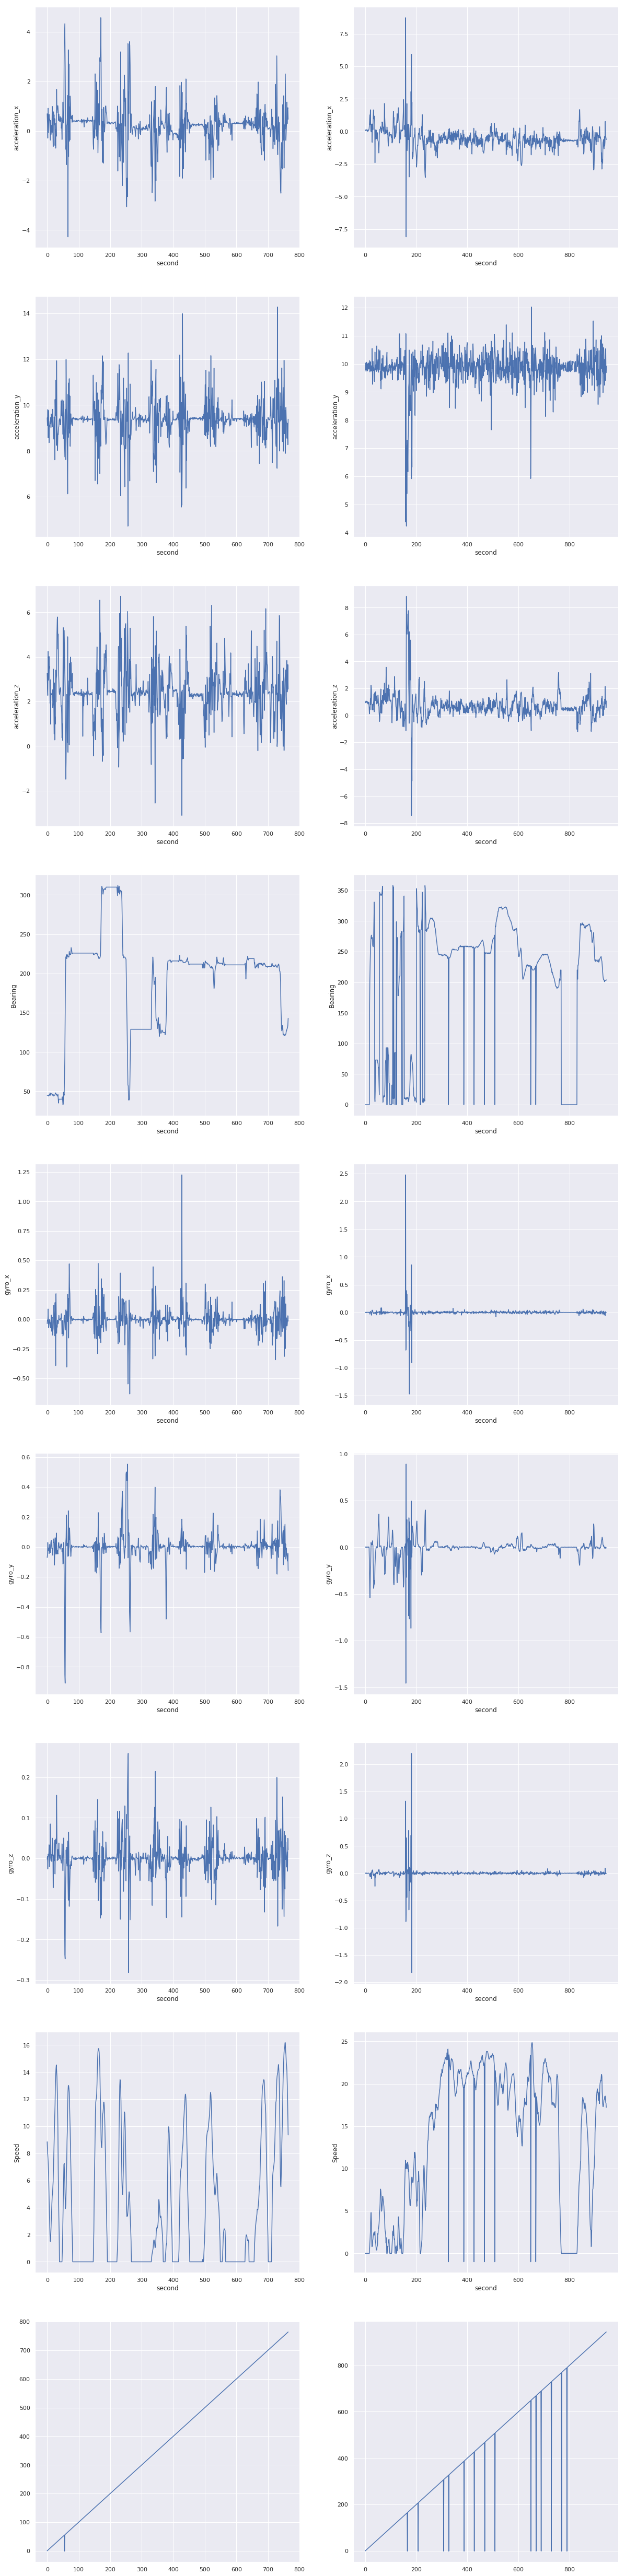

In [209]:
plot_all(2)

/home/kurniawanekn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'pandas.core.series.Series'> cannot be safely interpreted as an integer.
  """


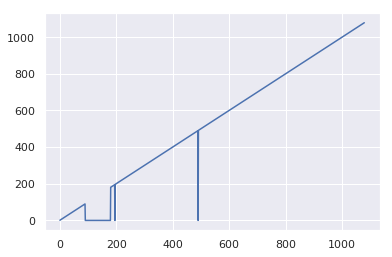

In [196]:
dx = all_data.loc[all_data['bookingID']==1709396983925].sort_values('second').reset_index(drop=True)

secs = []

x_sec = np.linspace(0,dx.tail(1)['second'],dx.tail(1)['second']+1).flatten()
secs = [-1] * (len(x_sec))


for i in dx.second.tolist():
    secs[int(i)] = i


sns.lineplot(x=x_sec, y=secs)

In [222]:
all_data.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07,1.613556e+07
mean,8.184819e+11,1.161034e+01,1.689684e+02,6.914535e-02,4.468977e+00,8.942974e-01,-1.710847e-03,2.800732e-04,-2.569689e-04,3.803482e+03,9.006545e+00
std,4.952476e+11,8.691672e+01,1.072966e+02,1.424161e+00,8.130664e+00,3.251549e+00,1.445619e-01,3.400630e-01,1.480825e-01,1.436686e+06,8.106415e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.081238e-01,-2.022476e+00,-9.316101e-01,-2.678888e-02,-2.993851e-02,-1.876500e-02,2.410000e+02,1.020000e+00
50%,8.074539e+11,4.250000e+00,1.688700e+02,6.137085e-02,9.081485e+00,7.757450e-01,-6.432411e-04,2.645046e-04,-3.542004e-05,5.200000e+02,7.530000e+00
75%,1.254130e+12,8.000000e+00,2.629840e+02,6.350620e-01,9.709778e+00,2.750938e+00,2.330639e-02,3.143085e-02,1.823425e-02,8.630000e+02,1.548000e+01
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02


In [15]:
df_dict['0']['gyro_x'].std()

0.06595417

In [19]:
def statform(booking_id):    
    std_gyro_x = df_dict[booking_id]['gyro_x'].std()
#     max_gyro_x = df['gyro_x'].max()
#     min_gyro_x = df['gyro_x'].min()
#     mean_gyro_x = df['gyro_x'].mean()
    
    return std_gyro_x#, max_gyro_x, min_gyro_x, mean_gyro_x

In [275]:
%%time
data[['std_gyro_x', 'max_gyro_x', 'min_gyro_x', 'mean_gyro_x']] = data['bookingID'].apply(statform)

KeyError: "None of [Index(['std_gyro_x', 'max_gyro_x', 'min_gyro_x', 'mean_gyro_x'], dtype='object')] are in the [columns]"

In [20]:
%%time
data['gyro_x'] = data['bookingID'].apply(statform)

CPU times: user 6.64 s, sys: 132 ms, total: 6.77 s
Wall time: 6.76 s


In [258]:
%%time
data['gyro_x'] = data['bookingID'].apply(statform)

CPU times: user 10min 31s, sys: 40 ms, total: 10min 31s
Wall time: 10min 31s


In [21]:
data

,bookingID,label,gyro_x
0,111669149733,0,0.023377
1,335007449205,1,0.081049
2,171798691856,0,0.052078
3,1520418422900,0,0.113392
4,798863917116,0,0.119730
5,283467841567,0,0.059805
6,231928234141,0,0.033362
7,188978561143,0,0.119909
8,1194000908346,0,0.043320
9,274877906944,1,0.084659


In [ ]:
%%time
data['speed'] = data['bookingID'].apply(lambda x: convert_list_col(all_data,'Speed',x))

In [80]:
data.loc[data.label==1].reset_index(drop=True)['bookingID'][0]

335007449205

In [283]:
%%time
z = full_df.sort_values(['bookingID','second'])
z.loc[z.bookingID==1709396983975]

CPU times: user 8.98 s, sys: 4.64 s, total: 13.6 s
Wall time: 13.6 s


In [284]:
%%time
z.loc[z.bookingID==1709396983975]

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 31.6 ms


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
7757479,1709396983975,65.0,282.278931,-0.945068,-8.657245,-6.429755,0.044805,-0.104059,-0.002657,0.0,-1.000000,1
7757700,1709396983975,65.0,294.364136,-1.874585,-8.604757,-4.961459,0.115045,-0.244791,-0.150002,1.0,-1.000000,1
7757681,1709396983975,65.0,316.479889,-1.986588,-8.673395,-4.481299,-0.010401,-0.379902,-0.173005,2.0,-1.000000,1
7757411,1709396983975,65.0,340.384003,-0.021234,-8.718854,-4.113440,-0.037234,-0.372667,-0.165887,3.0,-1.000000,1
7757439,1709396983975,91.0,357.988678,-0.406290,-9.306231,-3.330469,-0.002471,-0.163746,-0.115245,4.0,-1.000000,1
7757432,1709396983975,91.0,7.259726,0.002991,-8.918783,-4.267761,-0.028620,-0.079988,-0.044116,5.0,-1.000000,1
7757381,1709396983975,91.0,18.612366,-0.903198,-8.161832,-5.639755,-0.010052,-0.205205,-0.165471,6.0,-1.000000,1
7757600,1709396983975,91.0,26.661434,0.226248,-7.985827,-5.615232,-0.000742,-0.021281,-0.010680,7.0,-1.000000,1
7757391,1709396983975,91.0,26.661434,-0.268118,-8.920428,-4.059906,-0.002268,0.014901,-0.001090,8.0,-1.000000,1
7757569,1709396983975,91.0,26.661434,-0.121124,-8.865250,-4.442420,-0.006591,0.018058,0.000988,9.0,-1.000000,1


In [285]:
%%time
full_df.loc[full_df.bookingID==1709396983975]

CPU times: user 156 ms, sys: 4 ms, total: 160 ms
Wall time: 159 ms


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
7757314,1709396983975,8.0,14.806254,-0.289951,-7.436282,-6.281863,0.007139,0.035213,-0.000960,465.0,9.102511,1
7757315,1709396983975,46.0,26.496490,-0.131143,-9.658091,-2.252911,-0.006966,0.139436,0.024485,49.0,0.000000,1
7757316,1709396983975,165.0,36.279030,-0.064001,-8.368490,-4.645938,0.006337,0.022460,-0.013770,38.0,-1.000000,1
7757317,1709396983975,32.0,122.793922,-2.864813,-8.869586,-4.544403,-0.044962,-0.476116,-0.147901,68.0,4.432971,1
7757318,1709396983975,48.0,22.067860,-0.683380,-10.789182,-2.362970,-0.020723,-0.020285,-0.038660,449.0,-1.000000,1
7757319,1709396983975,40.0,11.246925,-0.427374,-9.190191,-3.927866,-0.025369,0.061541,0.019952,51.0,0.123175,1
7757320,1709396983975,200.0,329.572021,-1.078604,-8.868689,-4.609451,-0.002657,-0.200112,-0.066215,130.0,2.960753,1
7757321,1709396983975,8.0,255.311905,0.935349,-9.262568,-3.129193,0.043100,0.347217,0.140364,541.0,2.340552,1
7757322,1709396983975,8.0,15.810021,-0.232529,-8.553915,-4.731024,-0.029843,0.000854,-0.004652,467.0,7.257047,1
7757323,1709396983975,6.0,24.368900,-0.114844,-9.033178,-3.939529,-0.003347,0.005277,0.008488,364.0,2.954595,1


In [27]:
x = pd.read_csv('safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [224]:
full_df = pd.merge(all_data, data, on="bookingID")

In [269]:
x = full_df.loc[full_df['bookingID'] == 335007449205].sort_values('second')

x['gyro_x'].std()

0.08104943

In [235]:
full_df.groupby('label').mean()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
label,,,,,,,,,,,
0,8.040847e+11,11.089400,169.615479,0.069453,4.526827,0.863990,-0.001920,0.000570,-0.000337,5143.145020,9.180057
1,8.513317e+11,12.783854,167.527496,0.068987,4.322503,0.957994,-0.001244,-0.000423,-0.000065,749.577576,8.612786


In [236]:
full_df.groupby('label').max()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
label,,,,,,,,,,,
0,1700807049407,6070.101074,359.999481,47.708321,61.159355,63.656803,39.839748,62.542023,66.300781,1.495797e+09,56.698967
1,1709396983975,4618.293945,359.998535,66.873459,75.055885,78.055756,30.709417,80.314964,55.948853,8.235000e+03,148.018631


In [241]:
full_df.groupby('label').sem()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
label,,,,,,,,,,,
0,1.471862e+08,0.025655,0.031881,0.000393,0.002446,0.000914,0.000035,0.000075,0.000034,514.556596,0.002411
1,2.246411e+08,0.040039,0.048810,0.000740,0.003598,0.001642,0.000086,0.000219,0.000092,0.254813,0.003674


In [238]:
full_df.groupby('label').var()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
label,,,,,,,,,,,
0,2.429711e+23,7381.856445,11399.330078,1.729952,67.105873,9.374248,0.014028,0.062308,0.012976,2.969523e+12,65.190742
1,2.492334e+23,7917.621094,11766.390625,2.701310,63.926735,13.316209,0.036444,0.236359,0.042190,3.206793e+05,66.672211


In [242]:
full_df.groupby('label').std()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
label,,,,,,,,,,,
0,4.929209e+11,85.917731,106.767645,1.315277,8.191817,3.061739,0.118441,0.249616,0.113910,1.723231e+06,8.074078
1,4.992328e+11,88.981015,108.472995,1.643566,7.995420,3.649138,0.190903,0.486168,0.205402,5.662856e+02,8.165305


In [246]:
full_df.loc[full_df.bookingID ==678604832892]['acceleration_y'].std()

0.54565454

In [243]:
full_df.head()


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,678604832892,8.0,253.815094,-0.018842,-9.778915,0.141910,0.000004,0.127894,-0.003946,849.0,22.800875,0
1,678604832892,6.0,87.203369,0.268567,-9.703848,-1.076660,0.002257,0.005405,-0.008485,600.0,3.983518,0
2,678604832892,6.0,249.762634,0.645996,-10.483231,-0.967947,0.002164,0.023651,-0.003111,916.0,23.714880,0
3,678604832892,6.0,267.421600,0.004935,-12.841415,-2.063150,-0.015882,-0.070103,0.065709,997.0,20.843636,0
4,678604832892,8.0,272.301819,0.213388,-9.690390,-0.765027,-0.002547,0.129146,-0.044486,3.0,3.438376,0


In [219]:
from itertools import groupby, count

lst = [0, 1, 3, 5, 7, 8, 9, 10, 12, 13]
groups = [[y[1] for y in g] for k, g in groupby(enumerate(lst), key=lambda x: x[0]-x[1])]
groups
# [[0, 1], [3], [5], [7, 8, 9, 10], [12, 13]]

max(groups, key=len)


[7, 8, 9, 10]

In [220]:
groups

[[0, 1], [3], [5], [7, 8, 9, 10], [12, 13]]

In [216]:
val

<generator object <genexpr> at 0x7efb7ae786d0>